In [ ]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/imdb.csv',encoding = "ISO-8859-1", sep=',',
                  names=["Sentiment", "Timestamp", "Datetime", "Query", "Username","Tweet"])
df.head(3)

In [1]:
#select relavant columns
tweet_df = df[['Sentiment','Tweet']]
tweet_df.head(10)

NameError: ignored

In [ ]:
# preprocessing sentiment values to strings
def change_sentiment_type(sentiment):
    if 0 == sentiment:
        return "negative"
    else:
        return "positive"
        
tweet_df['Sentiment'] = tweet_df.apply(lambda x: change_sentiment_type(x['Sentiment']), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
tweet_df.tail(10)

,Sentiment,Tweet
1599990,negative,WOOOOO! Xbox is back
1599991,negative,@rmedina @LaTati Mmmm That sounds absolutely ...
1599992,negative,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599993,negative,@SCOOBY_GRITBOYS
1599994,negative,"@Cliff_Forster Yeah, that does work better tha..."
1599995,negative,Just woke up. Having no school is the best fee...
1599996,negative,TheWDB.com - Very cool to hear old Walt interv...
1599997,negative,Are you ready for your MoJo Makeover? Ask me f...
1599998,negative,Happy 38th Birthday to my boo of alll time!!! ...
1599999,negative,happy #charitytuesday @theNSPCC @SparksCharity...


In [ ]:
# converting all Tweets to lower case
tweet_df['Tweet'] = tweet_df.apply(lambda x: x['Tweet'].lower(), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
tweet_df.head(10)

,Sentiment,Tweet
0,positive,"- awww, that's a bummer. you shoulda got da..."
1,positive,is upset that he can't update his facebook by ...
2,positive,i dived many times for the ball. managed to s...
3,positive,my whole body feels itchy and like its on fire
4,positive,"no, it's not behaving at all. i'm mad. why am..."
5,positive,not the whole crew
6,positive,need a hug
7,positive,"hey long time no see! yes.. rains a bit ,onl..."
8,positive,nope they didn't have it
9,positive,que me muera ?


In [ ]:
# remove twitter usernames from 'Tweet' column in Dataframe
import numpy as np
import re

def remove_username_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt    

tweet_df['Tweet'] = np.vectorize(remove_username_pattern)(tweet_df['Tweet'], "@[\w]*") 
tweet_df.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Sentiment,Tweet
0,negative,"http://twitpic.com/2y1zl - awww, that's a bum..."
1,negative,is upset that he can't update his facebook by ...
2,negative,i dived many times for the ball. managed to s...
3,negative,my whole body feels itchy and like its on fire
4,negative,"no, it's not behaving at all. i'm mad. why am..."
5,negative,not the whole crew
6,negative,need a hug
7,negative,"hey long time no see! yes.. rains a bit ,onl..."
8,negative,nope they didn't have it
9,negative,que me muera ?


In [ ]:
# remove URLs from 'Tweet' column in Dataframe    
regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
tweet_df['Tweet'] = tweet_df['Tweet'].str.replace(regex,'', regex=True)
tweet_df.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Sentiment,Tweet
0,negative,"- awww, that's a bummer. you shoulda got da..."
1,negative,is upset that he can't update his facebook by ...
2,negative,i dived many times for the ball. managed to s...
3,negative,my whole body feels itchy and like its on fire
4,negative,"no, it's not behaving at all. i'm mad. why am..."
5,negative,not the whole crew
6,negative,need a hug
7,negative,"hey long time no see! yes.. rains a bit ,onl..."
8,negative,nope they didn't have it
9,negative,que me muera ?


In [ ]:
# remove stopwords from Tweets
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

tweet_df['Tweet'] = tweet_df['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
tweet_df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sentiment,Tweet
0,negative,"- awww, that's bummer. shoulda got david carr ..."
1,negative,upset can't update facebook texting it... migh...
2,negative,dived many times ball. managed save 50% rest g...
3,negative,whole body feels itchy like fire
4,negative,"no, behaving all. i'm mad. here? can't see there."
5,negative,whole crew
6,negative,need hug
7,negative,"hey long time see! yes.. rains bit ,only bit l..."
8,negative,nope
9,negative,que muera ?


In [ ]:
# remove punctations 'Tweet' column in Dataframe    
tweet_df['Tweet'] = tweet_df['Tweet'].str.replace(r'[^\w\d\s\']+','')
tweet_df.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sentiment,Tweet
0,negative,awww that's bummer shoulda got david carr thi...
1,negative,upset can't update facebook texting it might c...
2,negative,dived many times ball managed save 50 rest go ...
3,negative,whole body feels itchy like fire
4,negative,no behaving all i'm mad here can't see there
5,negative,whole crew
6,negative,need hug
7,negative,hey long time see yes rains bit only bit lol ...
8,negative,nope
9,negative,que muera


In [ ]:
# shuffle dataframe
from sklearn.utils import shuffle
tweet_df = shuffle(tweet_df)

tweet_df.head(10)

,Sentiment,Tweet
580363,negative,still want iphone
1534563,positive,happy morning too
146924,negative,life would much easier w umbrella amp import n...
1182513,positive,downtown kimi come find us
1586090,positive,aba aba aba really standing proud tall pure aw...
122000,negative,omg kno told us idols would come set gates tot...
444053,negative,season finale keeping kardashians tonight uk w...
100753,negative,lost please help find good home
588562,negative,i'm sorry bad day
941391,positive,had great meeting executives mxit todaynever k...


In [ ]:
# convert sentiment to numeric
sentiment_label = tweet_df.Sentiment.factorize()
sentiment_label

(array([0, 1, 0, ..., 0, 1, 0]),
 Index(['negative', 'positive'], dtype='object'))

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tweet = tweet_df.Tweet.values
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs)

In [ ]:
print(tokenizer.word_index)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(tweet[0])
print(encoded_docs[0])

still want iphone
[22, 23, 271]


In [ ]:
print(padded_sequence[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  22  23
 271]


In [ ]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           14911904  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 14,928,555
Trainable params: 14,928,555
Non-trainable params: 0
_________________________________________________________________
None


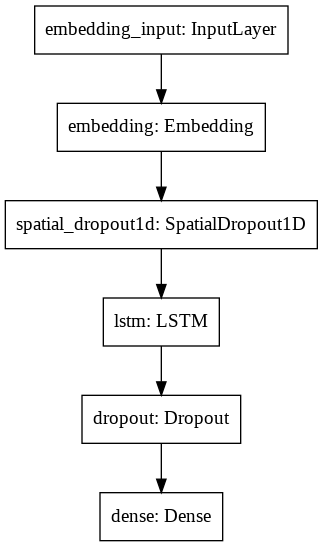

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=10, batch_size=32)

12840/40000 [========>.....................] - ETA: 1:21:40 - loss: 0.5257 - accuracy: 0.7333

KeyboardInterrupt: ignored